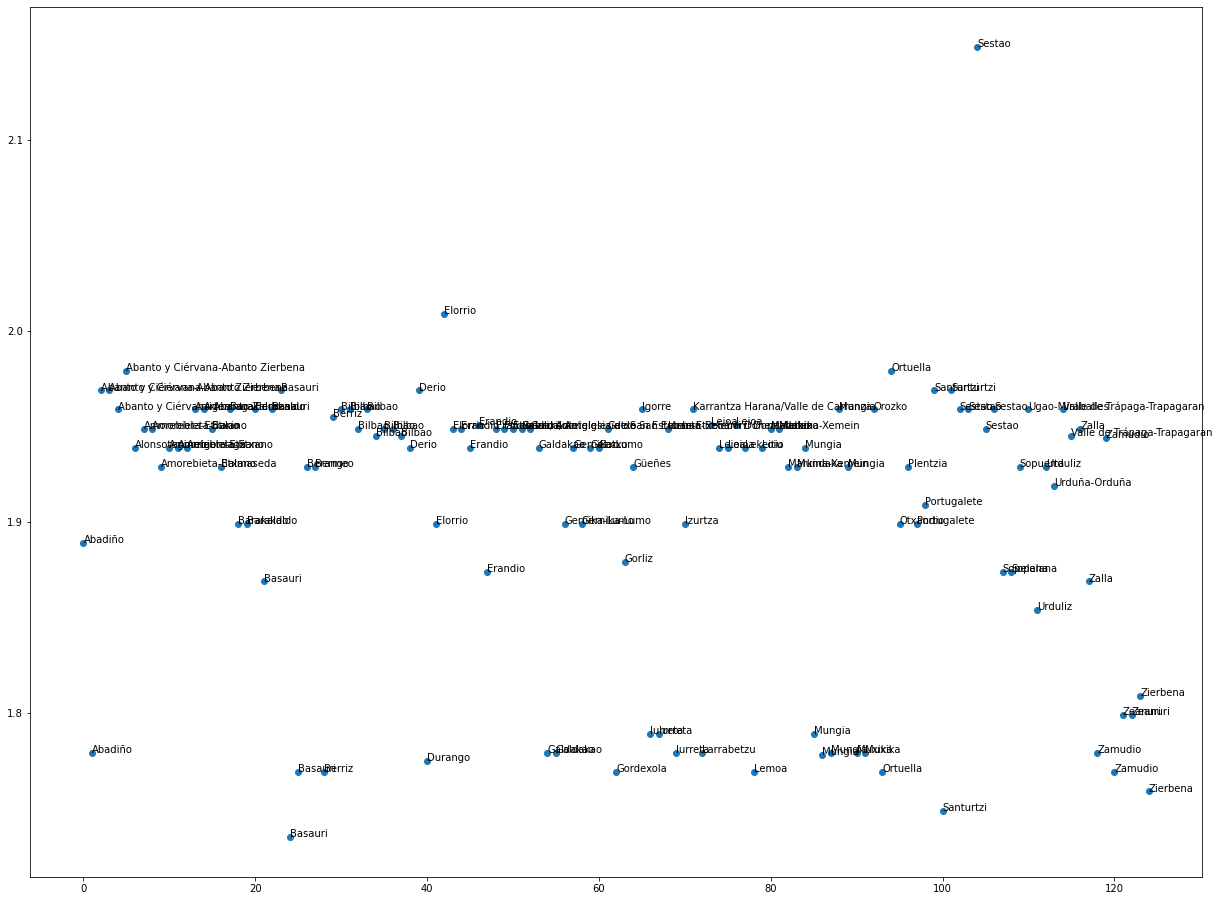

In [30]:
#Import lo que necesitamos
import json
from jsonpath_ng.ext import parse
import matplotlib.pyplot as plt
#Abrimos el archivo que interesa
with open("C:\\Users\\pelli\\Desktop\\datos gasolineras\\data\\2022\\09\\2022-09-15.json","r",encoding='utf-8') as datosJson:
	data = json.load(datosJson)
#Parse inicial de precios y creación de lista que los almacena
precios = []
for pr in parse("$..PrecioProducto").find(data):
	precios.append(float(pr.value.replace(",",".")))
#Parse inicial de localidades y creación de lista que las almacena
places = []
for mu in parse("$..Municipio").find(data):
    places.append(mu.value)
indices = [i for i in range(len(precios))]
#Crear figura de tamaño adecuado, luego scatterplot y después poner etiquetas
plt.figure(figsize=[21, 16])
plt.scatter(indices,precios)
for p in range(len(places)):
    plt.annotate(places[p],(indices[p],precios[p]))

#histograma??

Aviso: faltan datos de 04-18
Aviso: faltan datos de 04-19
Aviso: faltan datos de 04-20
Aviso: faltan datos de 04-21
Aviso: faltan datos de 08-12
Aviso: faltan datos de 08-13
Aviso: faltan datos de 08-14
Aviso: faltan datos de 08-15


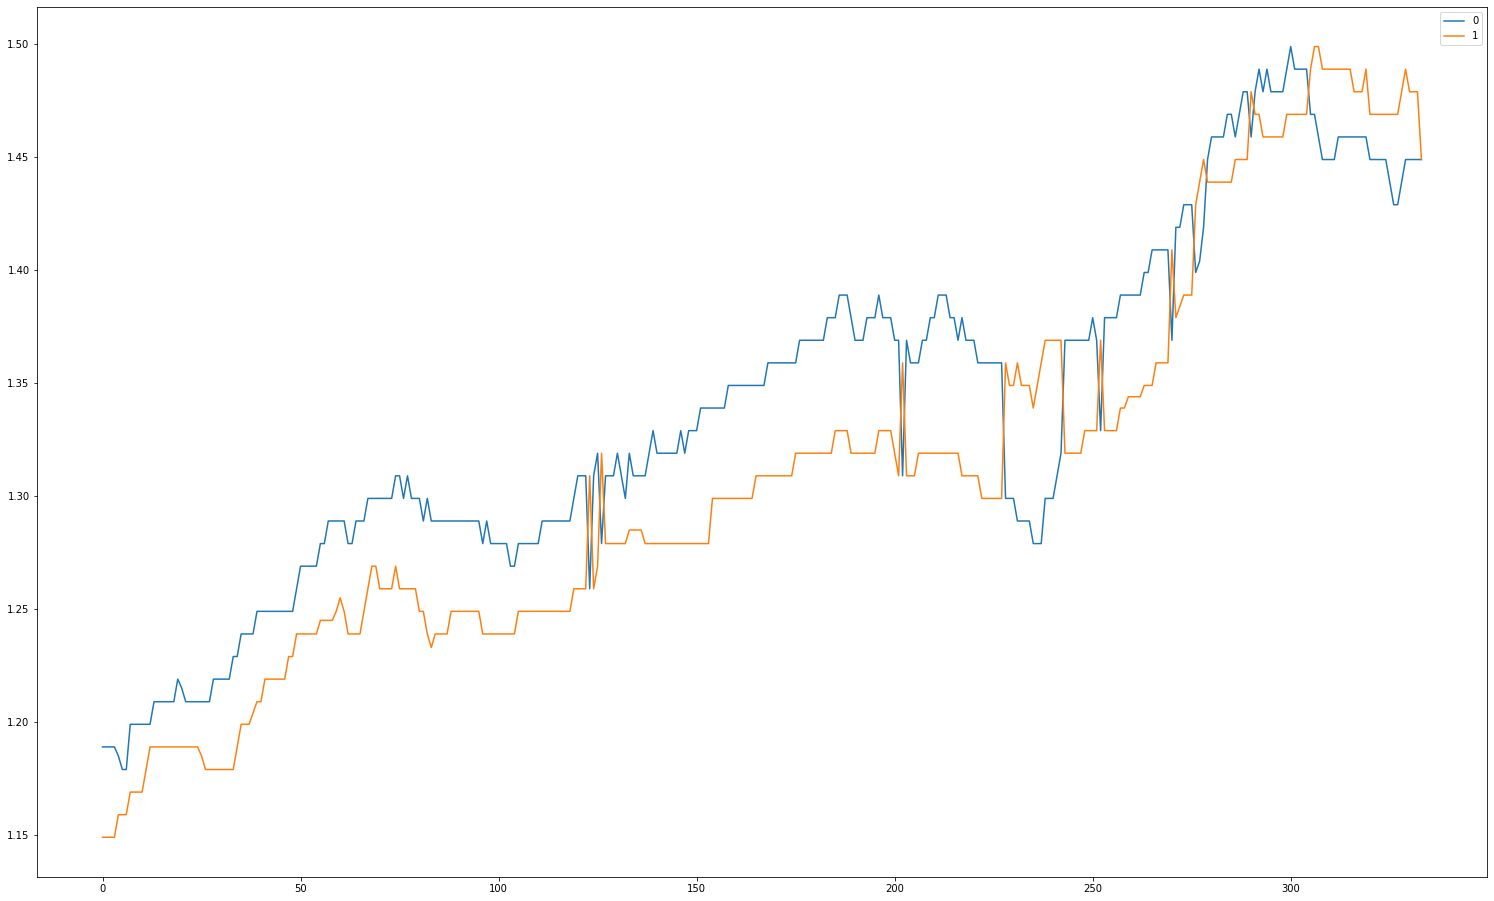

In [21]:
#Import lo que necesitamos
import json
from jsonpath_ng.ext import parse
import matplotlib.pyplot as plt
from statistics import mean
import numpy
import math
#inicio del diccionario que almacenará los precios y ciclo a través de los archivos
precios = {}
y = 2021
for m in range(1,12):
    m = str(m)
    if len(m) == 1:
        m = '0'+ m
    for d in range(1,32): #ciclo con cada dia
        d = str(d)
        if len(d) == 1:
            d = '0'+ d
        try:
            k = m+"-"+d
            datosJson = open(f"C:\\Users\\pelli\\Desktop\\datos gasolineras\\data\\{y}\\{m}\\{y}-{k}.json","r",encoding='utf-8')
            precios[k]= [] #vamos a guardar los precios de todas las gasolineras de un mismo sitio en un diccionario
            for pr in parse("$.ListaEESSPrecio[?(@.Municipio =~ 'Arrigorriaga')].PrecioProducto").find(json.load(datosJson)):
                precios[k].append(float(pr.value.replace(",",".")))
            if precios[k] == []: #si no hay datos de ese día (pero el archivo existe), copia el del día anterior
                precios[k] = list(precios.values())[len(list(precios.keys()))-2]
                print(f"Aviso: faltan datos de {k}")
        except FileNotFoundError: 
            continue

#fix missing values 
check = []
for a in precios.values():
    check.append(len(a))
target = math.ceil(mean(check))
keys = list(precios.keys())
for i in range(len(keys)):
    if len(precios[keys[i]])<target:
        if len(precios[keys[i+1]]) == target:
            precios[keys[i]] = precios[keys[i+1]]
        else:
            precios[keys[i]] = precios[keys[i-1]]
        print("arreglado",i)

#para poder representar gráficamente algo que tenga sentido tenemos que "trasponer" el diccionario 
plt.figure(figsize=[26, 16])
precios = numpy.transpose(list(precios.values()))

for i in range(len(precios)):
    plt.plot(precios[i], label=i)
plt.legend()
pass

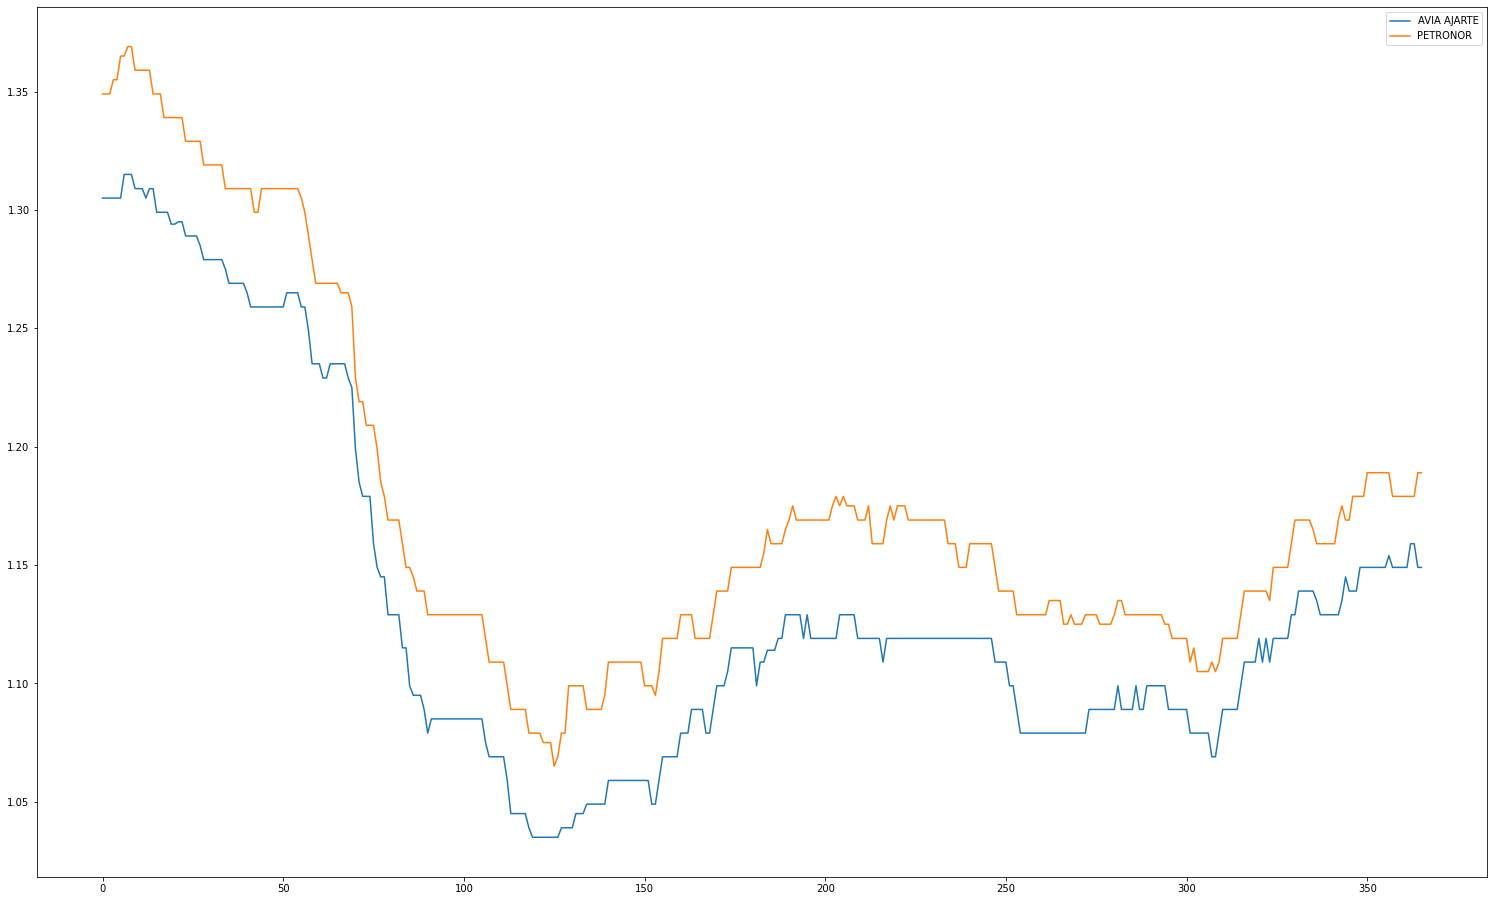

In [39]:
#Import lo que necesitamos
from cProfile import label
import json
from jsonpath_ng.ext import parse
import matplotlib.pyplot as plt
#Abrimos el archivo que interesa
y = "2020"
precios ={}
precios["AVIA AJARTE"] = []
precios["PETRONOR"] = []
for m in range(1,13):
	m = str(m)
	if len(m) == 1:
		m = '0'+ m
	for d in range(1,32):
		d = str(d)
		if len(d) == 1:
			d = '0'+ d
		try:
			with open(f"C:\\Users\\pelli\\Desktop\\datos gasolineras\\data\\{y}\\{m}\\{y}-{m}-{d}.json","r",encoding='utf-8') as datosJson:
				data = json.load(datosJson)
			for pr in parse("$.ListaEESSPrecio[?(@.Rotulo =~ 'AVIA AJARTE' & @.Municipio =~'Arrigorriaga')].PrecioProducto").find(data):
				precios["AVIA AJARTE"].append(float(pr.value.replace(",",".")))
			for pr in parse("$.ListaEESSPrecio[?(@.Rotulo =~ 'PETRONOR' & @.Municipio =~'Arrigorriaga')].PrecioProducto").find(data):
				precios["PETRONOR"].append(float(pr.value.replace(",",".")))
		except (FileNotFoundError, FileExistsError):
			continue
#Parse inicial de localidades y creación de lista que las almacena
plt.figure(figsize=[26, 16])
for i in precios:
	plt.plot(precios[i],label= i)
plt.legend()
pass
#histograma??